# **EDA**

# **Group Members**
1. Atharv Patole
2. Srujal Shinde
3. Rishita Gupta
4. Diya Farakte

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# Load the provided cardio dataset
df = pd.read_csv('/content/cleaned_data.csv', sep=';')

In [ ]:
# Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168      62    110     80            1     1      0   
1   1   55       1     156      85    140     90            3     1      0   
2   2   51       1     165      64    130     70            3     1      0   
3   3   48       2     169      82    150    100            1     1      0   
4   4   47       1     156      56    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
# Selecting a key numerical variable for analysis (e.g., 'age')
key_var = 'age'
if key_var in df.columns:
    # 1. Central Tendency
    mean_val = df[key_var].mean()
    median_val = df[key_var].median()
    mode_val = df[key_var].mode()[0]

    print(f"Central Tendency for {key_var}:")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")

Central Tendency for age:
Mean: 52.83116333999154
Median: 53.0
Mode: 55


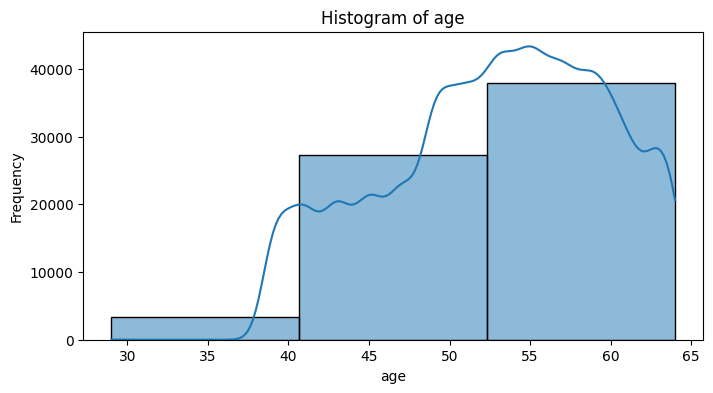

In [ ]:
# Histogram for central tendency
plt.figure(figsize=(8, 4))
sns.histplot(df[key_var], kde=True, bins=3)
plt.title(f'Histogram of {key_var}')
plt.xlabel(key_var)
plt.ylabel('Frequency')
plt.show()

## **Insights from Central Tendency**

1. Most number of people in the dataset have an age of 55.
2. From the histogram, we can see that that there are less number of people in the 30-40 age range as compared to 40-50, with most number of people having age above 50.


Variability Analysis for age:
Range: 35
Variance: 45.807087036374696
Standard Deviation: 6.768093308781632


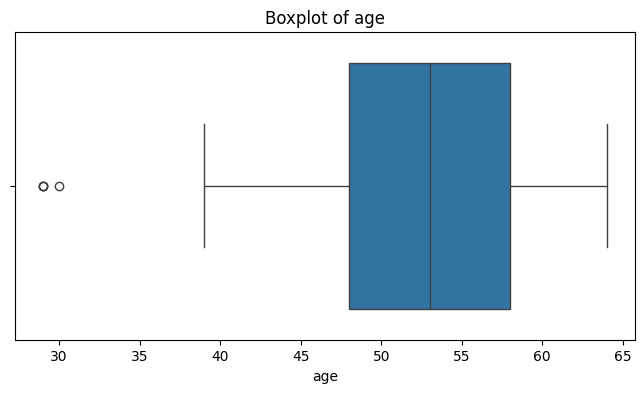

In [ ]:
# 2. Variability (Spread of Data)
range_val = df[key_var].max() - df[key_var].min()
variance_val = df[key_var].var()
std_dev_val = df[key_var].std()

print(f"\nVariability Analysis for {key_var}:")
print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")

# Boxplot for variability
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[key_var])
plt.title(f'Boxplot of {key_var}')
plt.xlabel(key_var)
plt.show()

## **Insights from Variability**

1. Ages 48-58 are in the inter-quartile range.
2. The data is widely spread across the ages 38 to 64.


Outliers Analysis for age:
Number of outliers detected: 4


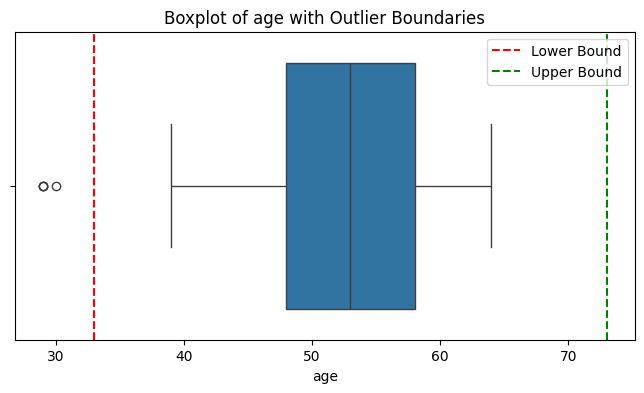

In [ ]:
# 3. Outliers using IQR
Q1 = df[key_var].quantile(0.25)
Q3 = df[key_var].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[key_var] < lower_bound) | (df[key_var] > upper_bound)]

print(f"\nOutliers Analysis for {key_var}:")
print(f"Number of outliers detected: {outliers.shape[0]}")

# Boxplot highlighting outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[key_var])
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.title(f'Boxplot of {key_var} with Outlier Boundaries')
plt.xlabel(key_var)
plt.legend()
plt.show()

# **Insights from Outlier Detection**
1. There are 4 outliers around the age 30.
2. These ages are meaningful variations and they would be useful while making predictions.


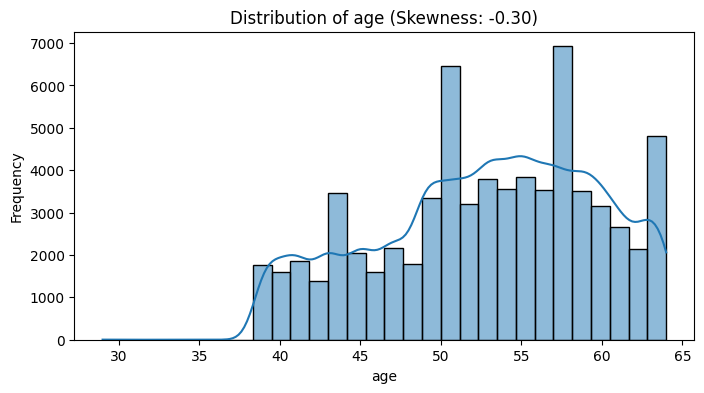


Distribution Shape:
The distribution of age is left-skewed.


In [ ]:
# 4. Distribution Shape
skewness = df[key_var].skew()
plt.figure(figsize=(8, 4))
sns.histplot(df[key_var], kde=True, bins=30)
plt.title(f'Distribution of {key_var} (Skewness: {skewness:.2f})')
plt.xlabel(key_var)
plt.ylabel('Frequency')
plt.show()

print(f"\nDistribution Shape:")
if skewness > 0:
 print(f"The distribution of {key_var} is right-skewed.")
elif skewness < 0:
 print(f"The distribution of {key_var} is left-skewed.")
else:
 print(f"The distribution of {key_var} is approximately symmetric.")

# **Insights from Distribution Shape**
1. From the graph, we can observe that the data is left skewed or negatively skewed.
2. This means more number of people are concentrated towards higher age.

In [ ]:
# 5. Missing Values & Data Quality
missing_values = df.isnull().sum()
print("\nMissing Values Summary:")
if missing_values.sum() == 0:
    print("No missing values detected in the dataset.")
else:
    print(missing_values[missing_values > 0])

    # Bar chart for missing values
    missing_values[missing_values > 0].plot(kind='bar', figsize=(8, 4))
    plt.title('Missing Values per Feature')
    plt.xlabel('Feature')
    plt.ylabel('Count of Missing Values')
    plt.show()

    print("Consider handling missing values through imputation or removal based on their significance.")



Missing Values Summary:
No missing values detected in the dataset.


# **Insights from Missing value detection**
No missing values were detected in the dataset, so the data is ready to be used.

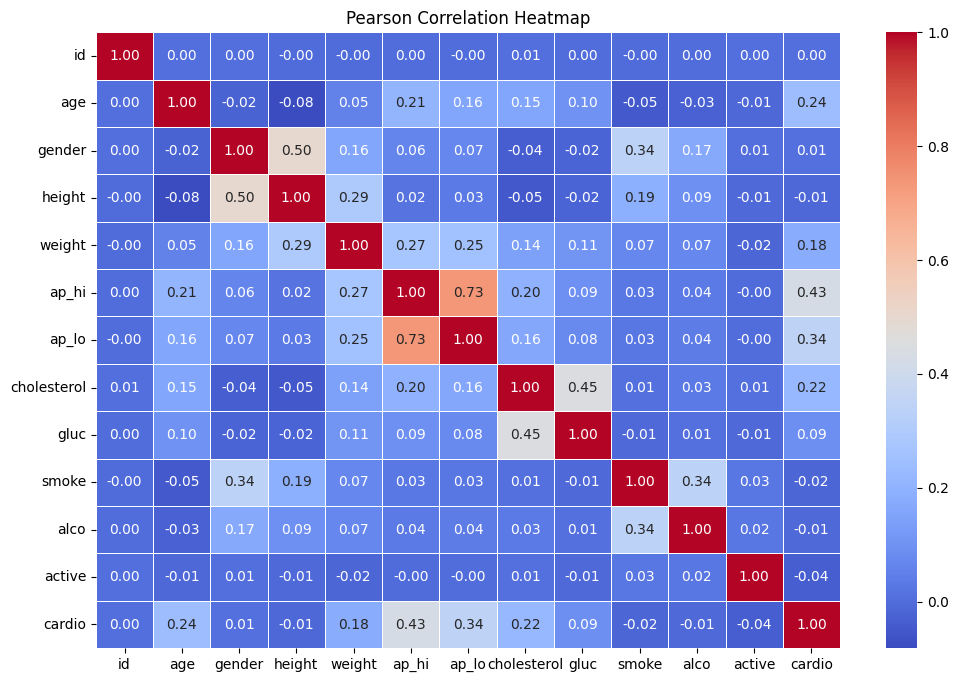

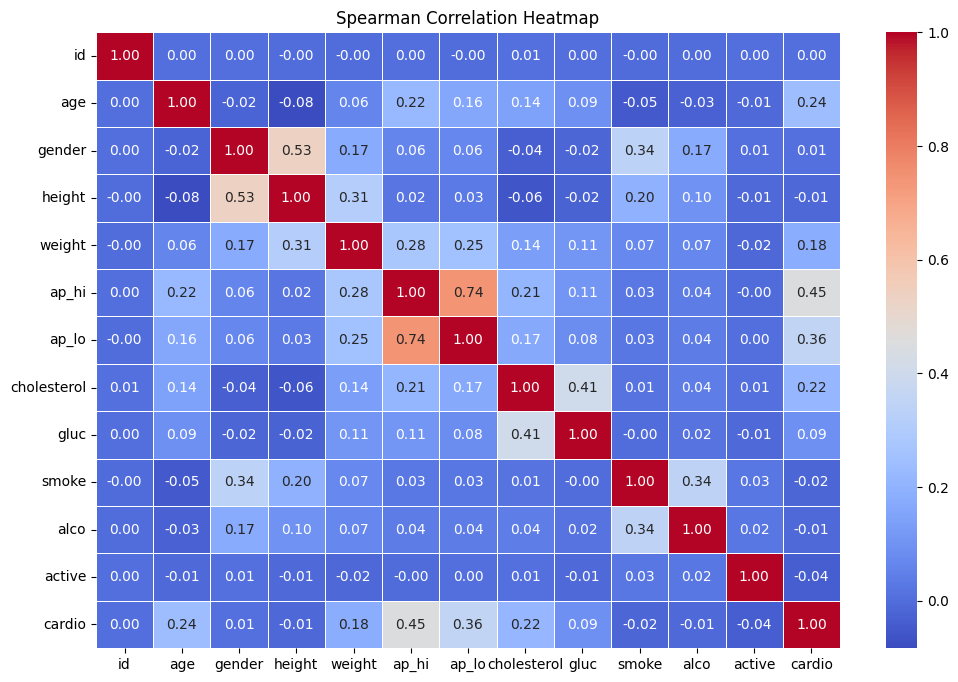

In [ ]:
#6. Correlation Analysis (For Numerical Variables)
# Correlation Analysis (Pearson and Spearman)
correlation_pearson = df.corr(method='pearson')
correlation_spearman = df.corr(method='spearman')

# Heatmap of Pearson correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Heatmap of Spearman correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

# Explanation:
# Significant correlations (values near +1 or -1) show a strong linear relationship.
# For example, high positive correlation between age and cholesterol levels might indicate older individuals tend to have higher cholesterol levels.


# **Insights from Correlation Analysis**
1. Systolic blood pressure and Diastolic blood pressure are highly correlated with an index of 0.74.
2. This is because Systolic and Diastolic are the upper and lower ranges of the same measure, that is heart rate.

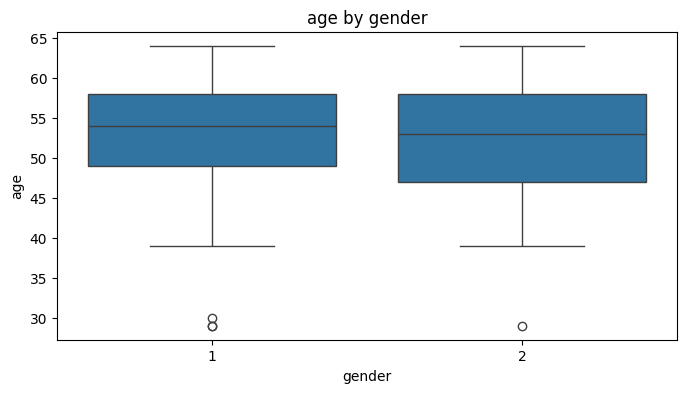

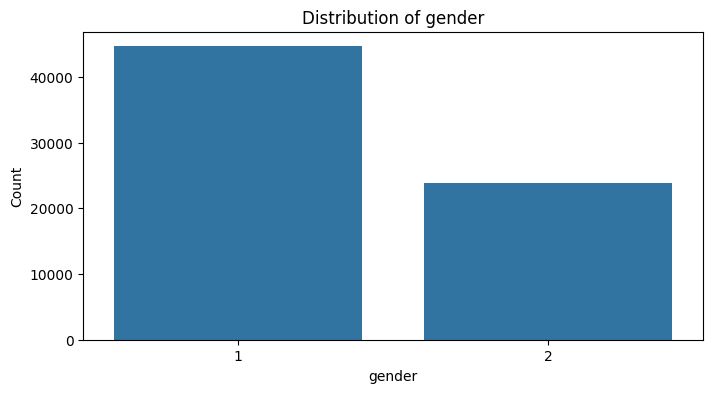

Summary of age by gender:
          count       mean       std   min   25%   50%   75%   max
gender                                                            
1       44668.0  52.948330  6.668095  29.0  49.0  54.0  58.0  64.0
2       23919.0  52.612358  6.945838  29.0  47.0  53.0  58.0  64.0


In [ ]:
# 7. Feature Relationships (Categorical & Numerical)
categorical_var = 'gender'  # Or use 'cardio' (0 or 1) as the categorical variable
key_var = 'age'  # Change to another numerical variable if desired

# Boxplot for Numerical Data Grouped by Categorical Variable (gender or cardio)
plt.figure(figsize=(8, 4))
sns.boxplot(x=categorical_var, y=key_var, data=df)
plt.title(f'{key_var} by {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel(key_var)
plt.show()

# Bar Chart for Categorical Variable Frequency Distribution (gender or cardio)
plt.figure(figsize=(8, 4))
sns.countplot(x=categorical_var, data=df)
plt.title(f'Distribution of {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel('Count')
plt.show()

# Summary of numerical values by gender or cardio
grouped_data = df.groupby(categorical_var)[key_var].describe()
print(f"Summary of {key_var} by {categorical_var}:")
print(grouped_data)


# **Insights from Feature Relationships**
1. There are higher number of women in the dataset as compared to men, with women being more than double of men.
2. The inter-quartile range of men is bigger than women, indicating a wider age range of men.

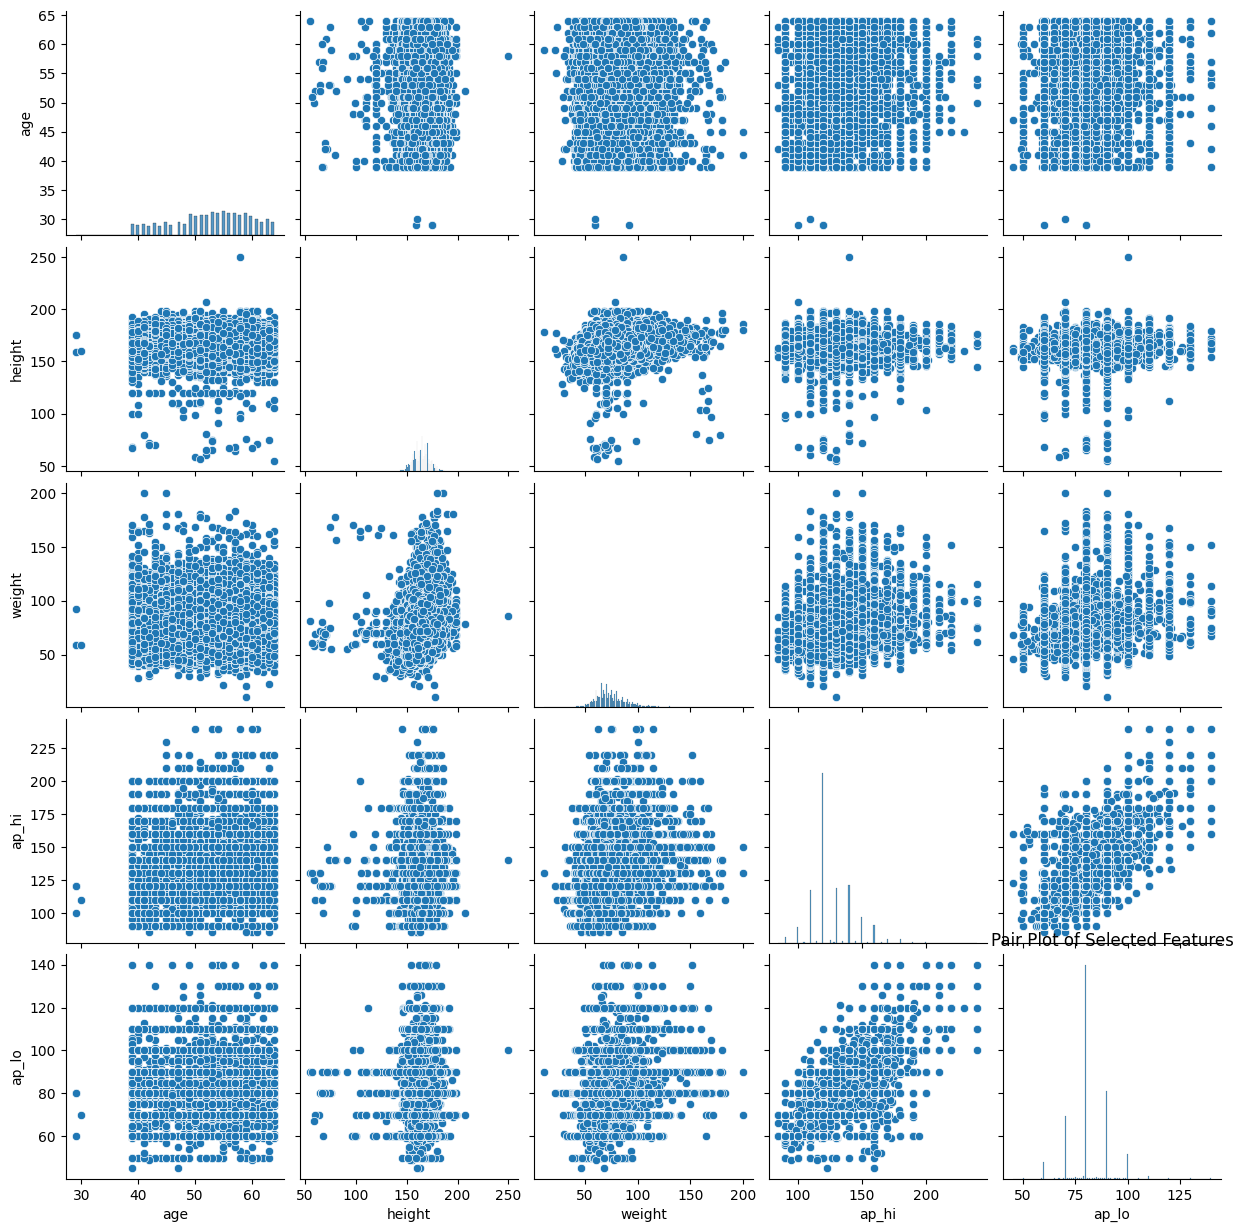

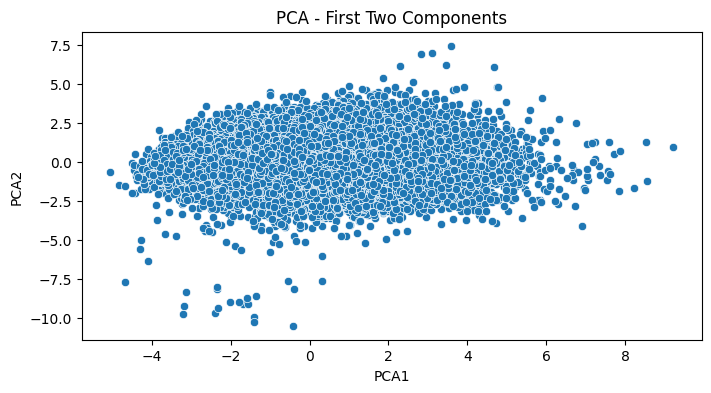

In [ ]:
# 8. Multivariate Analysis

# Pair Plot for Numerical Features
selected_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']  # Choosing relevant numerical columns for analysis
sns.pairplot(df[selected_vars])
plt.title('Pair Plot of Selected Features')
plt.show()

# Alternatively, perform PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize the data
df_normalized = df[selected_vars].dropna()  # Ensure no missing values for PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_normalized)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 4))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'])
plt.title('PCA - First Two Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


# **Insights from Multivariate Analysis**
1. Across every age range, the weight of the people is evenly distributed between 40 and 160 kgs.
2. The systolic and diastolic rate is proportionately distributed across all age ranges.

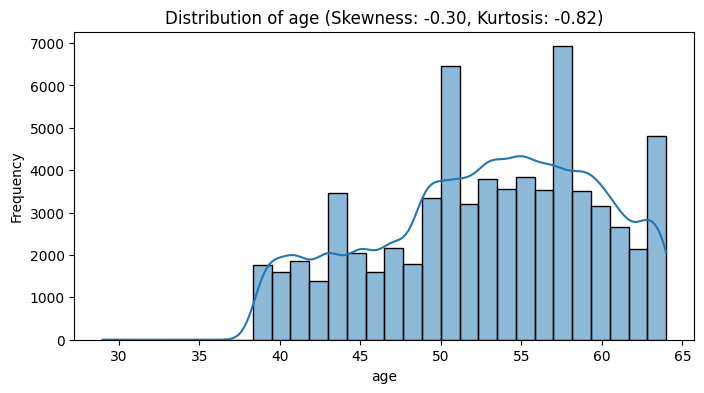

Skewness: -0.30
Kurtosis: -0.82
The distribution of age is left-skewed.
The distribution of age has light tails (platykurtic).


In [ ]:
# 9. Skewness & Kurtosis
skew_val = df[key_var].skew()
kurtosis_val = df[key_var].kurtosis()

# Histogram or Density Plot for Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df[key_var], kde=True, bins=30)
plt.title(f'Distribution of {key_var} (Skewness: {skew_val:.2f}, Kurtosis: {kurtosis_val:.2f})')
plt.xlabel(key_var)
plt.ylabel('Frequency')
plt.show()

# Print skewness and kurtosis values
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

if skew_val > 0:
    print(f"The distribution of {key_var} is right-skewed.")
elif skew_val < 0:
    print(f"The distribution of {key_var} is left-skewed.")
else:
    print(f"The distribution of {key_var} is approximately symmetric.")

if kurtosis_val > 3:
    print(f"The distribution of {key_var} has heavy tails (leptokurtic).")
elif kurtosis_val < 3:
    print(f"The distribution of {key_var} has light tails (platykurtic).")
else:
    print(f"The distribution of {key_var} is normal (mesokurtic).")


# **Insights from Skewness and Kurtosis**
1. As discussed earlier, the data is left-skewed.
2. The Kurtosis value is -0.82, which means it is platykurtic, that is it has a flatter tail.

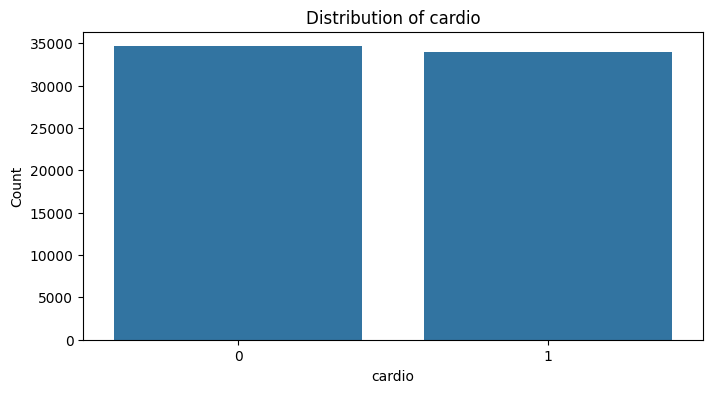

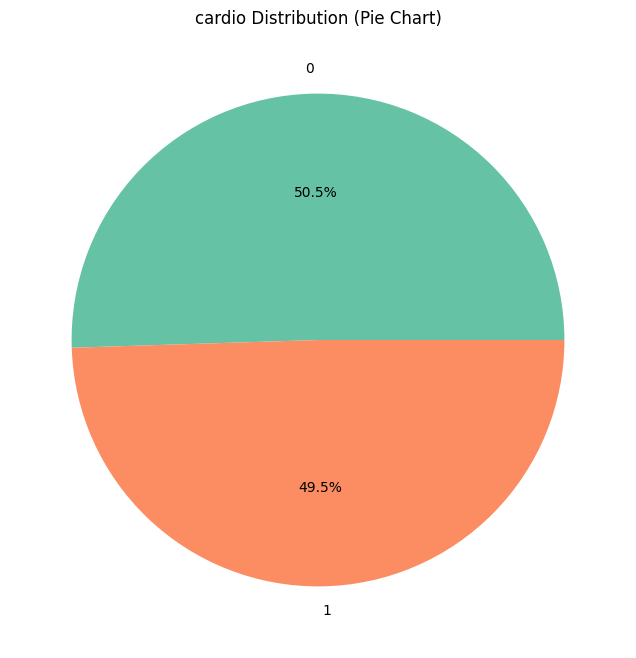

Distribution of cardio:
cardio
0    34637
1    33950
Name: count, dtype: int64


In [ ]:
# 10. Categorical Data Analysis
categorical_var = 'cardio'
# Bar Chart for Categorical Distribution (cardio)
plt.figure(figsize=(8, 4))
sns.countplot(x=categorical_var, data=df)
plt.title(f'Distribution of {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel('Count')
plt.show()

# Pie Chart for Categorical Data Distribution
plt.figure(figsize=(8, 8))
category_counts = df[categorical_var].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette("Set2", len(category_counts)))
plt.title(f'{categorical_var} Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

# Summary of major categories and proportions
print(f"Distribution of {categorical_var}:")
print(category_counts)


# **Insights from Categorical Data Analysis**
1. The number of people with cardiovascular disease is 33950 and those without is 34637.
2. This indicates that this particular category is evenly disrtibuted.